<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load modules and Set constants

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, cv2, glob, zipfile
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
WIDTH, HEIGHT = 256, 256
CROP_WIDTH, CROP_HEIGHT = 32, 32
CONCAT_WIDTH, CONCAT_HEIGHT = CROP_WIDTH + CROP_WIDTH, CROP_HEIGHT
CROP_IMAGE_NUMBER = (WIDTH // CROP_WIDTH) * (HEIGHT // CROP_HEIGHT)

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '33',
    'date' : '07-21-2021',
    'description' : 'Get intersect ratio and show top 10 similar image with 1\n'
    }

ROOT_DIR = os.path.join('/content')

BITMAP_DIR = os.path.join(ROOT_DIR, 'Bitmap')
IMAGE_DIR = os.path.join(ROOT_DIR, 'Image_Files')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', '1_University', 'PiLab', 'Experiment')
DATA_DIR = os.path.join(EXPERIMENT_DIR, 'Data')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Data"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'BITMAP_DIR:      {BITMAP_DIR}')
print(f'IMAGE_DIR:       {IMAGE_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')
print(f'CURR_RESULT_DIR: {CURR_RESULT_DIR}')

ROOT_DIR:        /content
BITMAP_DIR:      /content/Bitmap
EXPERIMENT_DIR:  /content/drive/MyDrive/1_University/PiLab/Experiment
DATA_DIR:        /content/drive/MyDrive/1_University/PiLab/Experiment/Data
RESULT_DIR:      /content/drive/MyDrive/1_University/PiLab/Experiment/Results
CURR_RESULT_DIR: /content/drive/MyDrive/1_University/PiLab/Experiment/Results/Trajectory_Clusetring_32_07-21-2021_Data


# Load Bitmaps

In [4]:
os.chdir(ROOT_DIR)
zipfile.ZipFile(DATA_DIR + "/Bitmap.zip").extractall(ROOT_DIR)

In [5]:
os.chdir(BITMAP_DIR)
print(sorted(glob.glob('*png'))[:10])

['0th data.png', '1000000th data.png', '1000064th data.png', '1000128th data.png', '1000192th data.png', '1000256th data.png', '1000320th data.png', '100032th data.png', '1000384th data.png', '1000448th data.png']


<Figure size 432x288 with 0 Axes>

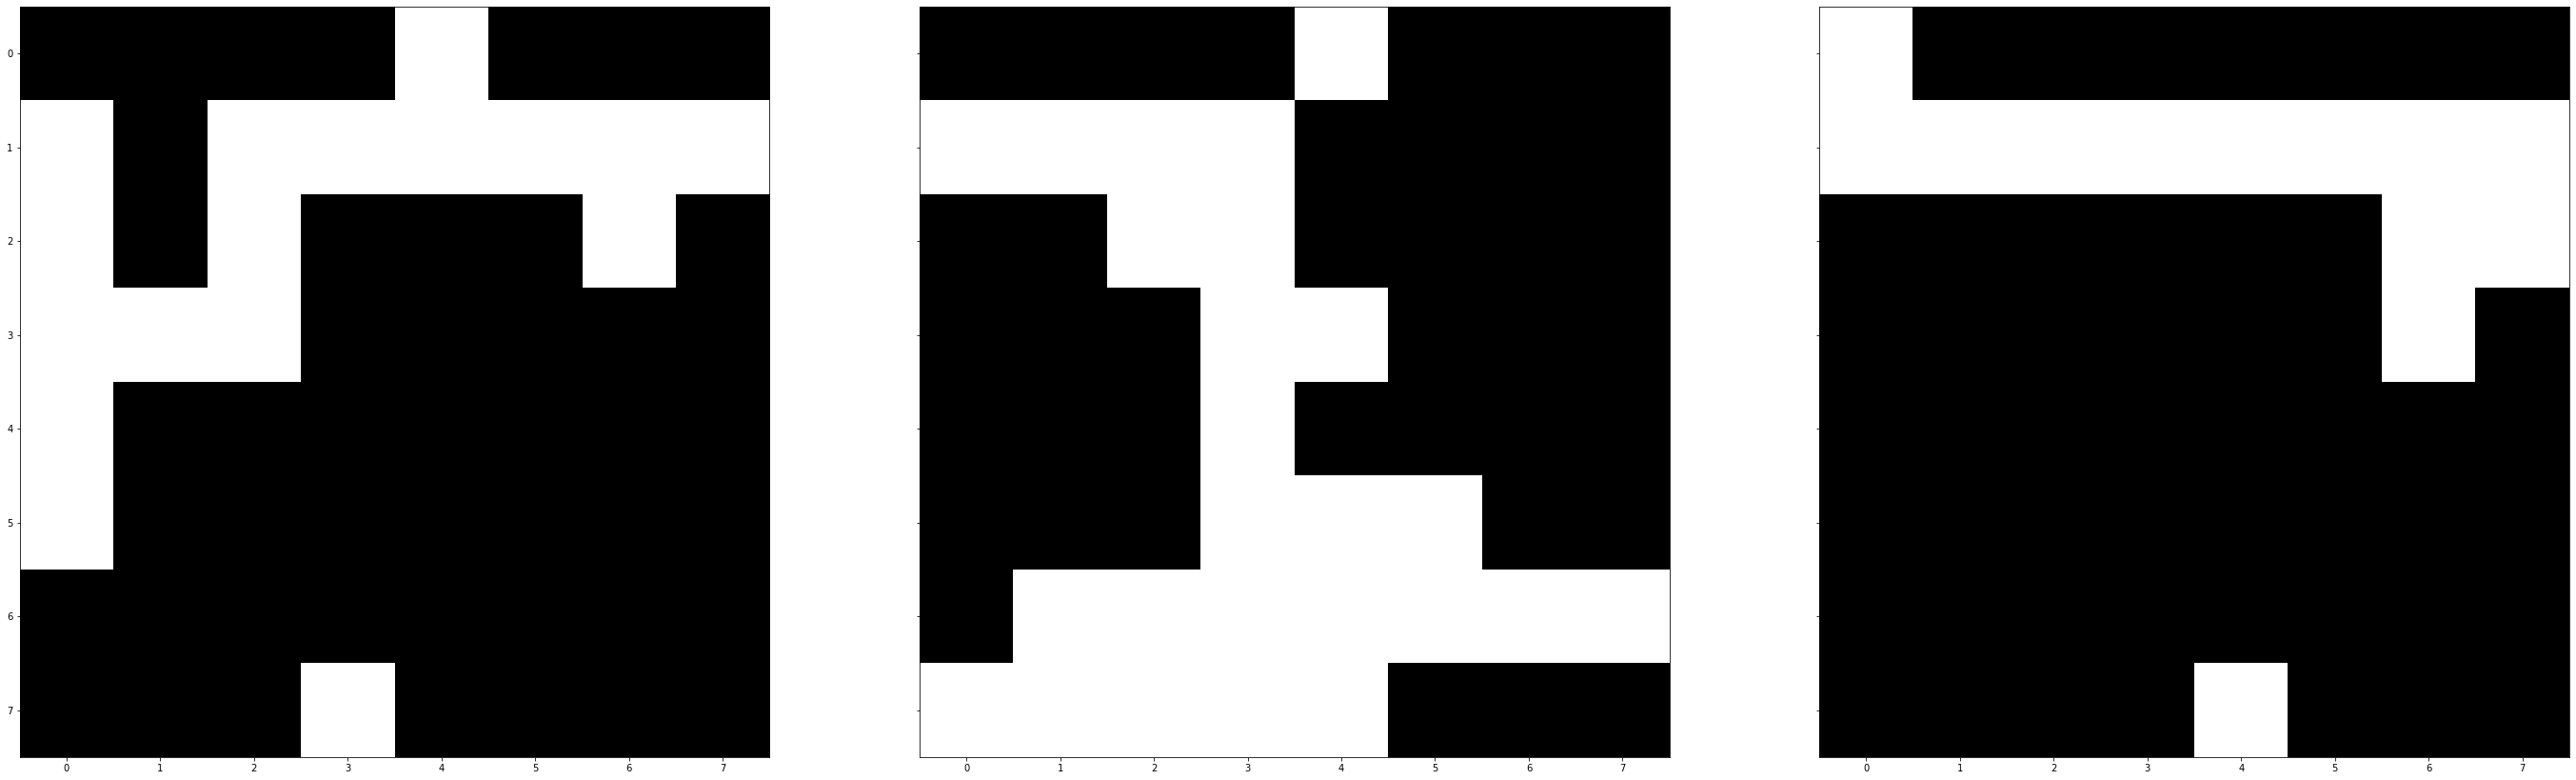

In [6]:
os.chdir(BITMAP_DIR)

file_names = sorted(glob.glob('*png'))

bitmap_images = [ ]
for name in file_names:
    bitmap_images.append(cv2.imread(name, cv2.IMREAD_GRAYSCALE))

plt.gray()
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (48, 16))
for i in range(3):
    ax[i].imshow(bitmap_images[i])
plt.show()

# Get Intersect Ratio

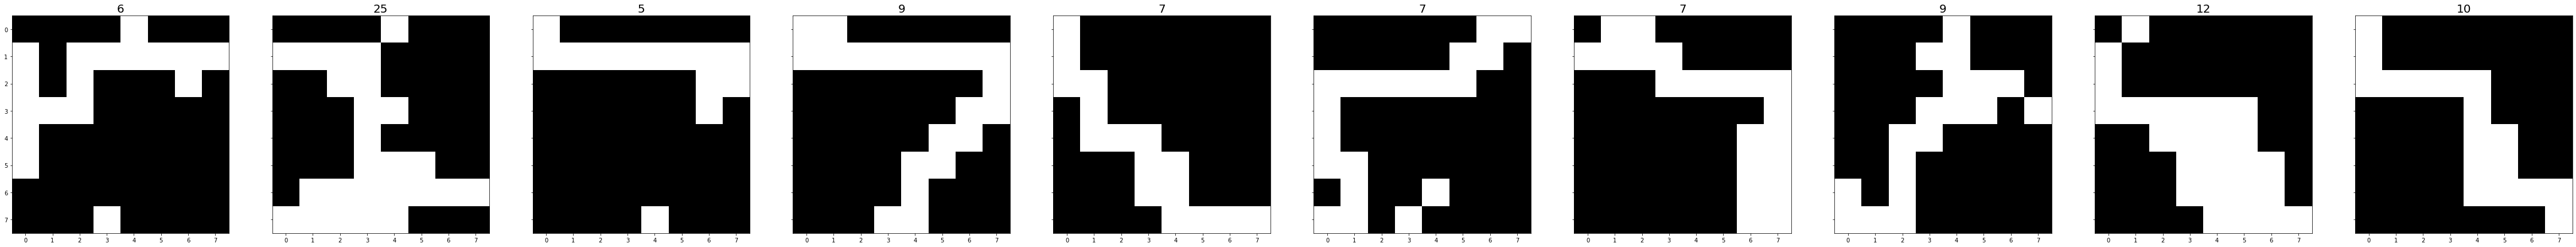

In [7]:
bitmap0 = bitmap_images[1]

fig, ax = plt.subplots(1, 10, sharey = True, figsize = (80, 8))
for idx, bitmap in enumerate(bitmap_images[:10]):
    cnt = 0
    for i in range(8):
        for j in range(8):
            if (bitmap0[i][j] and bitmap[i][j]):
                cnt += 1
    
    ax[idx].imshow(bitmap)
    ax[idx].set_title(str(cnt), fontsize = 20)

os.chdir(CURR_RESULT_DIR)
plt.savefig('First_10_ratio.png')
plt.show()

In [8]:
bitmap0 = bitmap_images[1]

counts = [ ]
for idx, bitmap in enumerate(bitmap_images):
    cnt = 0
    for i in range(8):
        for j in range(8):
            if (bitmap0[i][j] and bitmap[i][j]):
                cnt += 1
    
    counts.append((idx, cnt))

In [17]:
maxCnt = max(counts[2:], key = lambda x : x[1])
print(maxCnt)

(15175, 23)


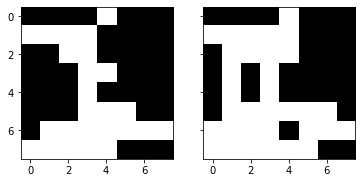

In [18]:
fig, ax = plt.subplots(1, 2, sharey = True)
ax[0].imshow(bitmap_images[1])
ax[1].imshow(bitmap_images[maxCnt[0]])
plt.show()

In [11]:
over10 = [ ]
for cnt in counts:
    if (cnt[1] > 10):
        over10.append(cnt)
print(len(over10)) # 3029

3029


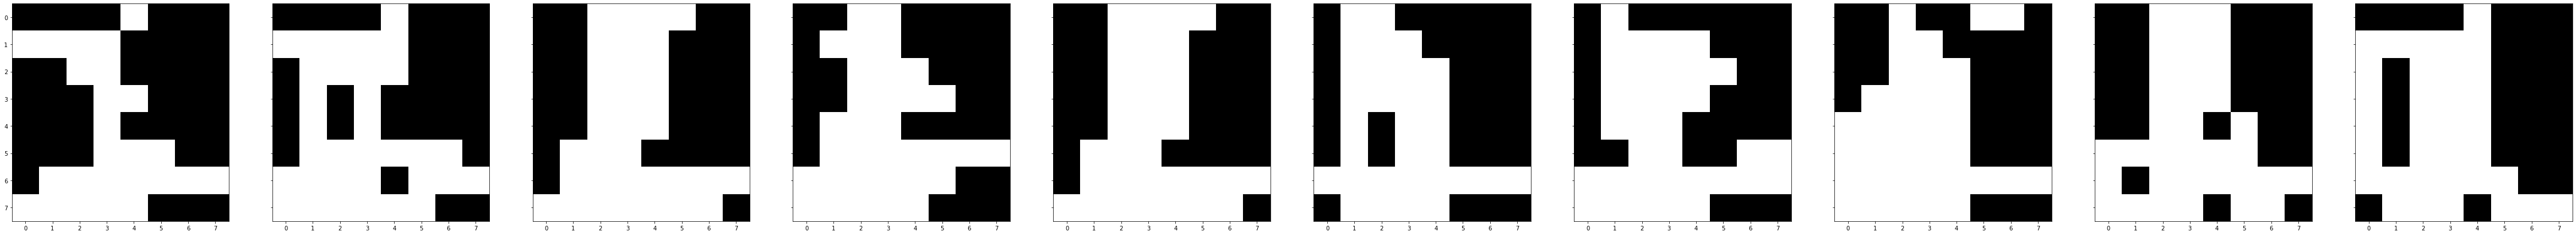

In [12]:
over10.sort(key = lambda x: x[1], reverse = True)

fig, ax = plt.subplots(1, 10, sharey = True, figsize = (80, 8))
for i in range(10):
    ax[i].imshow(bitmap_images[over10[i][0]])

os.chdir(CURR_RESULT_DIR)
plt.savefig('Top_10_Similar_Bitmap.png')
plt.show()

# Show image files

In [13]:
os.chdir(ROOT_DIR)
zipfile.ZipFile(DATA_DIR + "/Image_Files.zip").extractall(ROOT_DIR)

In [14]:
map_table = pd.read_csv(DATA_DIR + '/Map_Table.csv', header = 0)
print(map_table.keys())
map_table.head()

Index(['ImageNumber', ' LowDimNumber'], dtype='object')


,ImageNumber,LowDimNumber
0,1,0
1,10,64
2,100,128
3,1000,192
4,10000,256


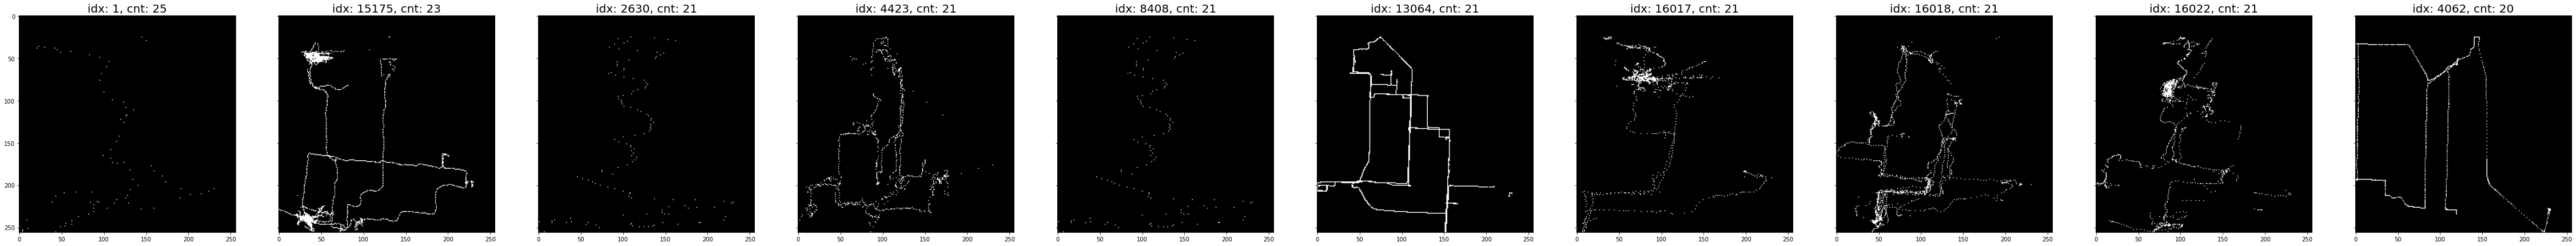

In [19]:
over10.sort(key = lambda x : x[1], reverse = True)

os.chdir(IMAGE_DIR)
fig, ax = plt.subplots(1, 10, sharey = True, figsize = (80, 8))
for i in range(10):
    image_file_name = map_table.loc[map_table[' LowDimNumber'] == int(file_names[over10[i][0]].split('th')[0])].iloc[0]['ImageNumber']
    ax[i].imshow(cv2.imread(f'Geolife_trajectory{image_file_name}.png', cv2.IMREAD_GRAYSCALE))
    ax[i].set_title(f'idx: {over10[i][0]}, cnt: {over10[i][1]}', fontsize = 20)

os.chdir(CURR_RESULT_DIR)
plt.savefig('Top_10_Similar_Image.png')
plt.show()